## Importing Required Libraries

In [1]:
import pandas as pd
import os
import glob as gb
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

## Assigning Path for Dataset

In [24]:
TRAIN_DIR = "/content/drive/MyDrive/Colab_Notebooks/Emotion-Detection/train"
TEST_DIR = "/content/drive/MyDrive/Colab_Notebooks/Emotion-Detection/test"
BATCH_SIZE=64

### Will see how many categories and images present

In [25]:
for folder in os.listdir(TRAIN_DIR):
    files = gb.glob(pathname= str(TRAIN_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For training data, found {len(files)} in folder {folder}')

For training data, found 1891 in folder Disgust
For training data, found 1932 in folder Happiness
For training data, found 1896 in folder Anger
For training data, found 1922 in folder Sadness
For training data, found 1932 in folder Surprise
For training data, found 1922 in folder Fear


In [26]:
for folder in os.listdir(TEST_DIR):
    files = gb.glob(pathname= str(TEST_DIR+ '/'+ folder + '/*.jpg'))
    print(f'For testing data, found {len(files)} in folder {folder}')

For testing data, found 241 in folder Surprise
For testing data, found 247 in folder Disgust
For testing data, found 241 in folder Happiness
For testing data, found 241 in folder Fear
For testing data, found 237 in folder Anger
For testing data, found 241 in folder Sadness


### Will see some random images withe their labels

In [27]:
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # We will view images from here
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # read in the image and plot it using matplolib
    img = mpimg.imread(target_folder+'/'+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off')
    print(f"Image shape {img.shape}")

    return img

In [28]:
class_names = ['Anger','Disgust','Fear','Happiness','Sadness','Surprise']

Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)
Image shape (416, 416, 3)


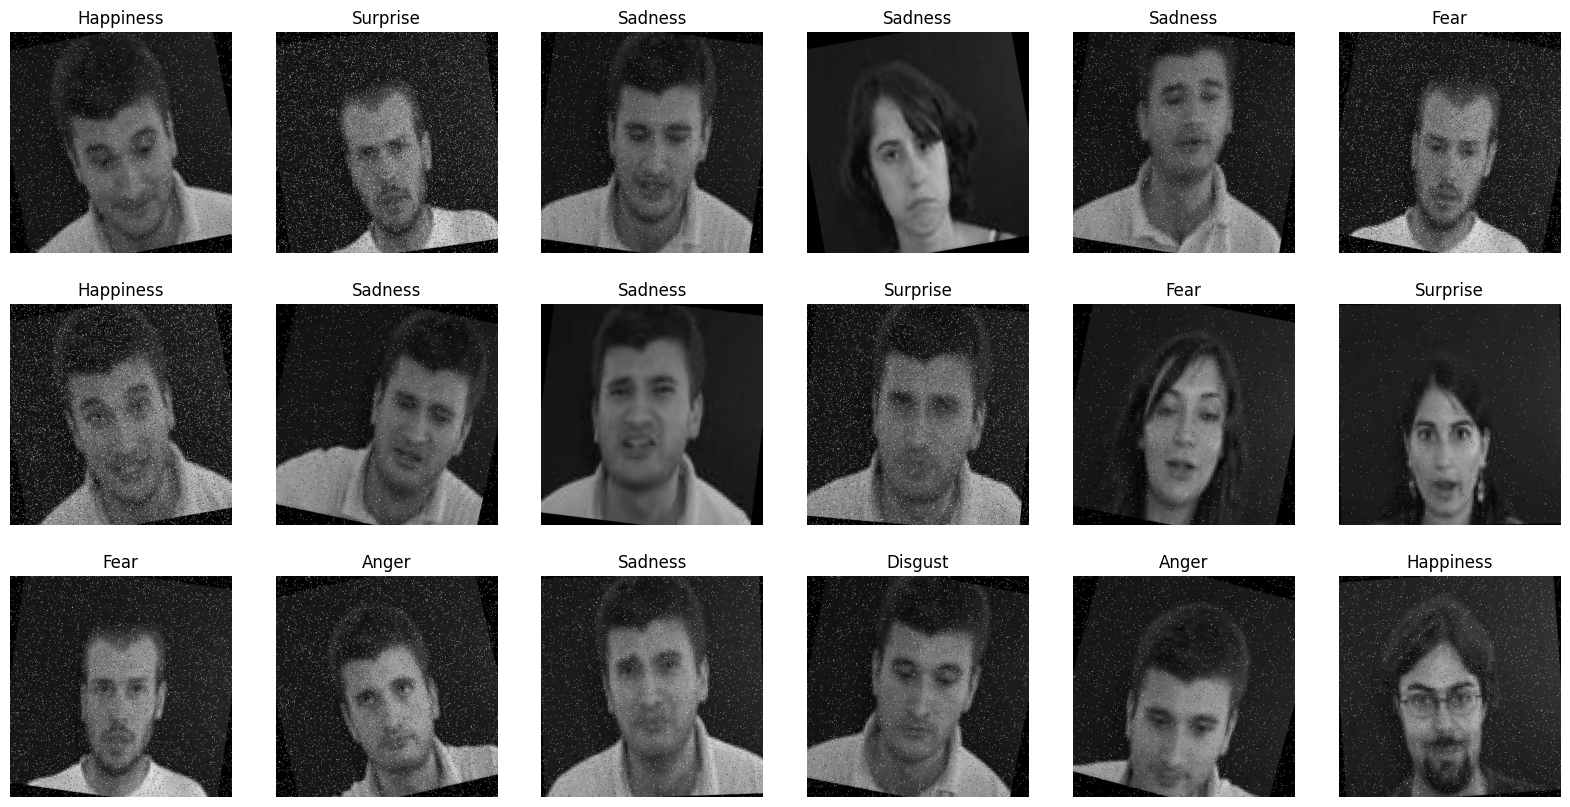

In [29]:
plt.figure(figsize=(20,10))
for i in range(18):
    plt.subplot(3, 6, i+1)
    class_name = random.choice(class_names)
    img = view_random_image(target_dir="/content/drive/MyDrive/Colab_Notebooks/Emotion-Detection/train/", target_class=class_name)

### Preparing data for training

In [30]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(TRAIN_DIR,
                                                 target_size = (128, 128),
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(TEST_DIR,
                                            target_size = (128, 128),
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 11495 images belonging to 6 classes.
Found 1448 images belonging to 6 classes.


### Basic model building (CNN Classifier)

In [31]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(16, (3, 3), input_shape = (128, 128, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))



# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 6, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [32]:
## model summary
classifier.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 28800)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [33]:
history = classifier.fit(training_set,
                         epochs = 50,
                         validation_data = test_set)


classifier.save('model1.h5')  # creates a HDF5 file 'my_model.h5'

Epoch 1/50
180/180 [==============================] - 2489s 14s/step - loss: 1.7637 - accuracy: 0.2487 - val_loss: 1.6291 - val_accuracy: 0.3301
Epoch 2/50
180/180 [==============================] - 260s 1s/step - loss: 1.4995 - accuracy: 0.3890 - val_loss: 1.3350 - val_accuracy: 0.4662
Epoch 3/50
180/180 [==============================] - 238s 1s/step - loss: 1.3024 - accuracy: 0.4799 - val_loss: 1.1414 - val_accuracy: 0.5463
Epoch 4/50
180/180 [==============================] - 244s 1s/step - loss: 1.1352 - accuracy: 0.5487 - val_loss: 0.9831 - val_accuracy: 0.6112
Epoch 5/50
180/180 [==============================] - 248s 1s/step - loss: 1.0296 - accuracy: 0.5982 - val_loss: 0.9679 - val_accuracy: 0.6188
Epoch 6/50
180/180 [==============================] - 239s 1s/step - loss: 0.9348 - accuracy: 0.6369 - val_loss: 0.8522 - val_accuracy: 0.6651
Epoch 7/50
180/180 [==============================] - 254s 1s/step - loss: 0.8657 - accuracy: 0.6639 - val_loss: 0.8334 - val_accuracy: 0.67

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Evaluating the model

In [34]:
classifier.evaluate(test_set)

23/23 [==============================] - 17s 686ms/step - loss: 0.4952 - accuracy: 0.8425


[0.49518463015556335, 0.8425414562225342]

Text(0, 0.5, 'Loss')

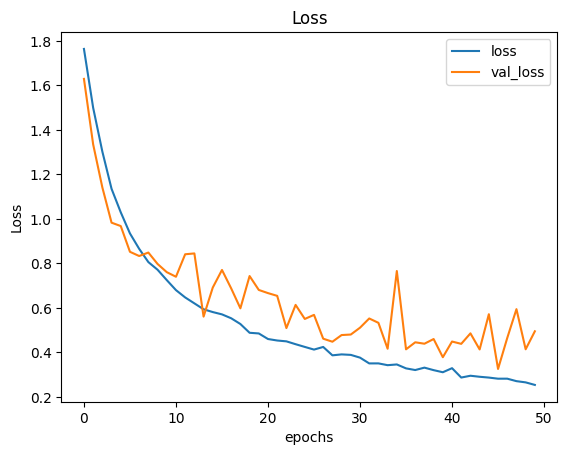

In [36]:
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Accuracy')

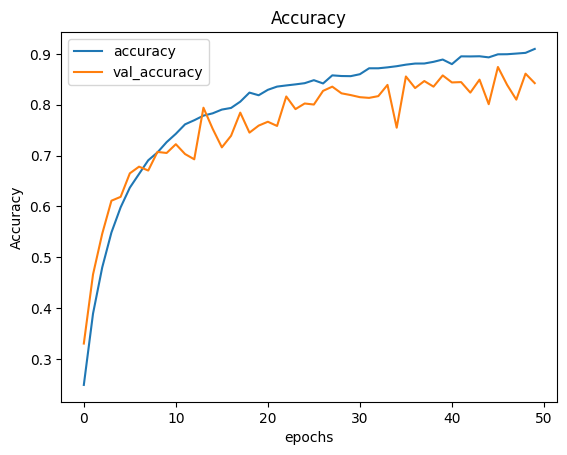

In [38]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')

In [49]:
model_path = "model1.h5"
loaded_model = keras.models.load_model(model_path)

import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image

image = cv2.imread("/content/drive/MyDrive/Colab_Notebooks/Emotion-Detection/train/Fear/myvideo_frames0_jpg.rf.057d0129ebd9e8cd8d83eff6eafc03f2.jpg")

image_fromarray = Image.fromarray(image, 'RGB')
resize_image = image_fromarray.resize((128, 128))
expand_input = np.expand_dims(resize_image,axis=0)
input_data = np.array(expand_input)
input_data = input_data/255

pred = loaded_model.predict(input_data)
result = pred.argmax()
result

1/1 [==============================] - 0s 275ms/step


2

In [41]:
training_set.class_indices

{'Anger': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happiness': 3,
 'Sadness': 4,
 'Surprise': 5}